In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("data_wrangling/final_product.csv")
df = df.drop(columns=["Unnamed: 0"])

X = df.drop('OilPeakRate', axis=1)
y = df['OilPeakRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

dtree = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=3, n_jobs=20, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_

y_pred = best_grid.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('Root Mean Squared Error:', math.sqrt(mse))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Root Mean Squared Error: 115.18827159857402


In [7]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=20, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_

y_pred = best_grid.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('Root Mean Squared Error:', math.sqrt(mse))

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10; total time=   0.4s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10; total time=   0.4s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.3s

Fitting 3 folds for each of 144 candidates, totalling 432 fits
{'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Root Mean Squared Error: 99.1705978009789
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 1.6min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 2.1min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.1min
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  51.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.9min
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 1.0min

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  27.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.5min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 1.0min
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.1min
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time= 2.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  28.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time= 1.5min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 2.0min
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  33.4s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total t

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 1.0min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 2.1min
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 1.6min
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  34.6s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 2.0min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time= 2.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total ti

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  57.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 1.9min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  29.5s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  29.9s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  27.7s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  55.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  58.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total t

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.5min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.8min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 2.0min
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 2.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  20.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 1.9min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 2.1min
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 1.8min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total t

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 2.5min
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.0min
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  57.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  37.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 2.2min
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  33.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total t

In [2]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('Root Mean Squared Error:', math.sqrt(mse))

Root Mean Squared Error: 120.53846934577766


In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
}

ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=3, n_jobs=20, verbose=2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

best_grid = grid_search.best_estimator_

y_pred = best_grid.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('Root Mean Squared Error:', math.sqrt(mse))


Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'alpha': 1.0}
Root Mean Squared Error: 121.12716083343452


RMSE 116.02596775498132


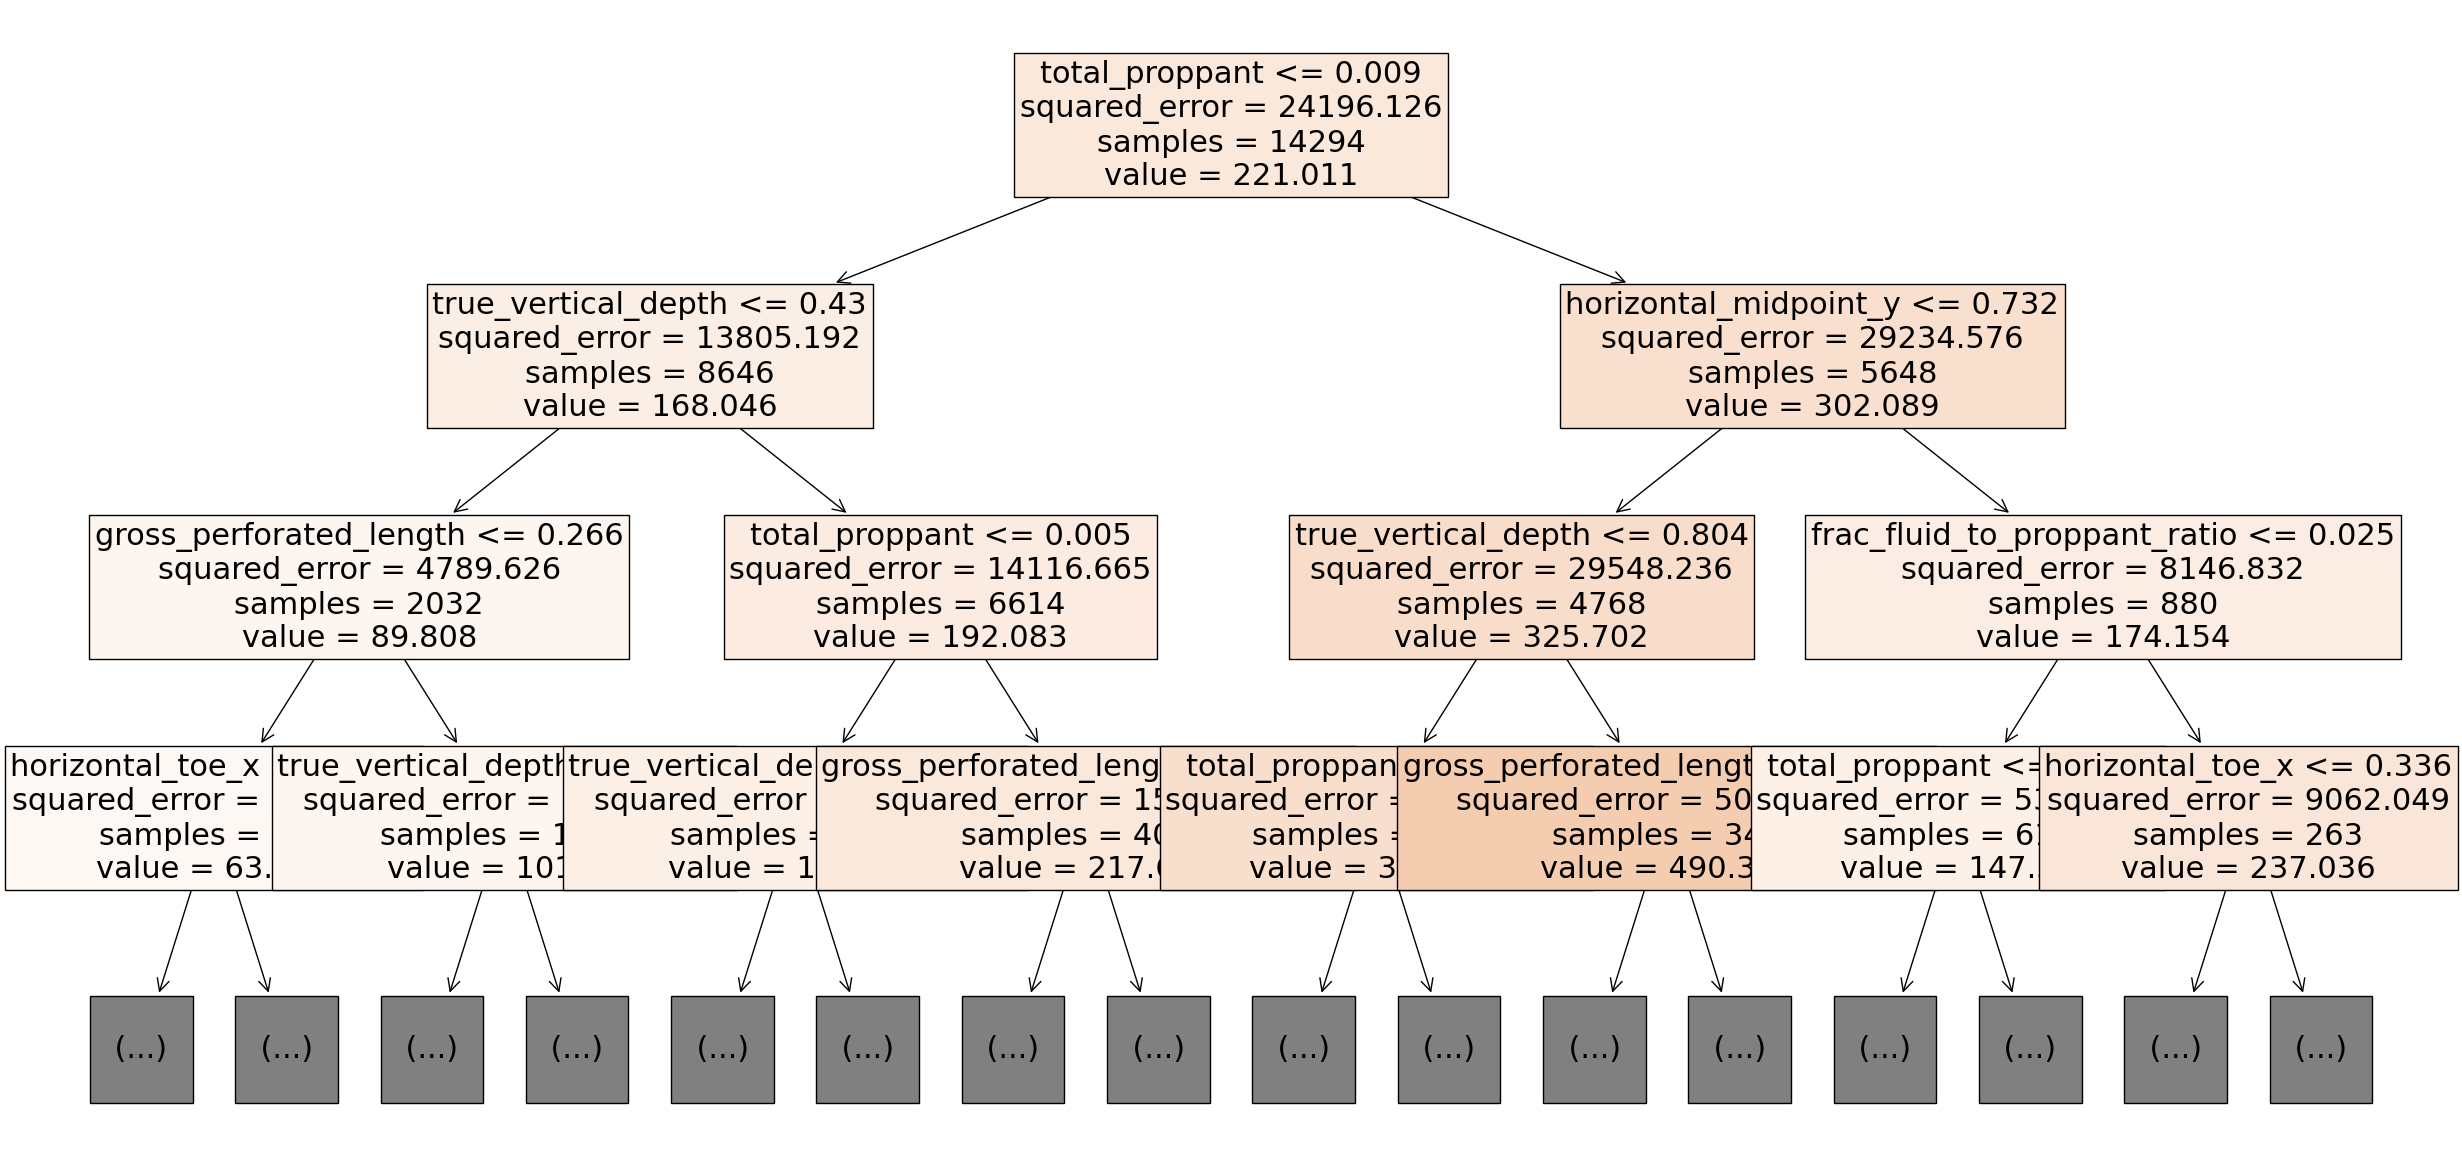

In [4]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from matplotlib import colors

cmap = colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

dtree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(30,15))
tree_plot = plot_tree(dtree, filled=True, feature_names=X.columns, max_depth=3, fontsize=22)
plt.show()

In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=400)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 99.75603681467035


In [6]:
y_pred = rf.predict(X_test)
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))

y_pred = rf.predict(X_train)
print('RMSE', math.sqrt(mean_squared_error(y_train, y_pred)))

RMSE 99.75603681467035
RMSE 47.29835508425571


In [7]:
importances = dtree.feature_importances_

features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

features = features.sort_values('Importance', ascending=False)

top_20_features = features.head(20)

print(top_20_features)

                                  Feature  Importance
5                          total_proppant    0.379561
7                     true_vertical_depth    0.156100
4                 gross_perforated_length    0.101011
14                  horizontal_midpoint_y    0.097308
1                               surface_y    0.035652
13                  horizontal_midpoint_x    0.025686
0                               surface_x    0.022139
8                      proppant_intensity    0.020662
19                               toe_dist    0.017020
17                  num_neighboring_wells    0.016344
2                                    bh_x    0.015240
16                       horizontal_toe_y    0.014815
15                       horizontal_toe_x    0.014092
94  well_family_relationship_Sibling Well    0.012806
21                              toe_angle    0.012295
11           frac_fluid_to_proppant_ratio    0.011426
6                             total_fluid    0.010246
18                    surfac

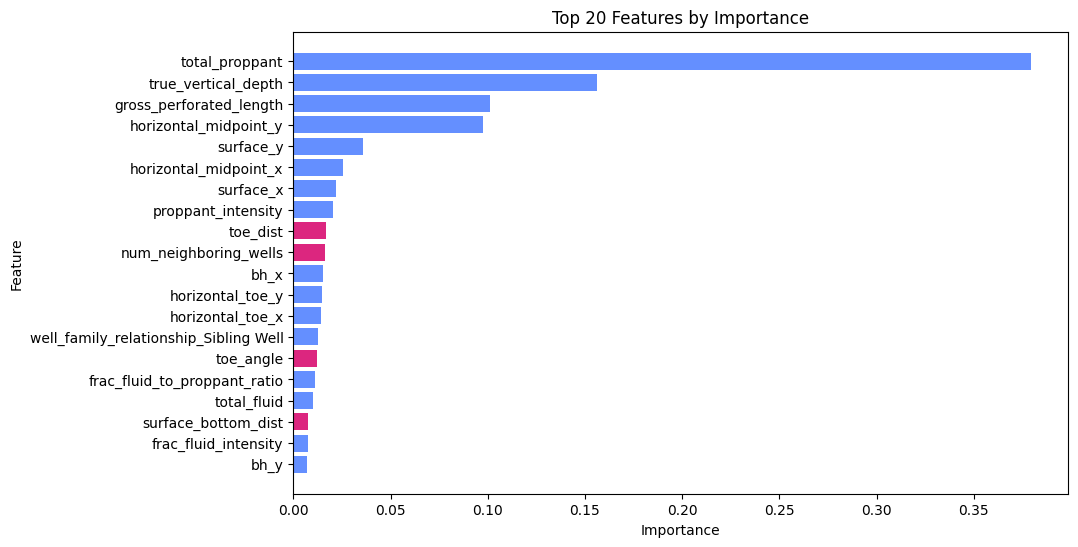

In [11]:
red_features = ['toe_dist', 'num_neighboring_wells', 'toe_angle', 'surface_bottom_dist']

plt.figure(figsize=(10, 6))

colors = ['#DC267F' if feature in red_features else '#648FFF' for feature in top_20_features['Feature']]

plt.barh(top_20_features['Feature'], top_20_features['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()
plt.show()
